In [27]:
import pandas as pd
import numpy as np
import csv
import ast
import matplotlib.pyplot as plt

In [99]:
with open('Datasets/vocabulary.csv') as f:
    reader = csv.reader(f)
    vocab = [word for word in reader]
    
vocab = vocab[0]

In [101]:
from sklearn.feature_extraction import stop_words
from nltk.corpus import stopwords

columns = ['mxm_track_id', 'genre', 'rating']
for i in range(len(vocab)):
    if vocab[i] not in stop_words.ENGLISH_STOP_WORDS and vocab[i] not in stopwords.words('english'):
        columns.append(vocab[i])

In [102]:
columns

['mxm_track_id',
 'genre',
 'rating',
 'love',
 'know',
 'like',
 'que',
 'time',
 'come',
 'oh',
 'la',
 'got',
 'feel',
 'want',
 'let',
 'make',
 'way',
 'say',
 'ca',
 'day',
 'baby',
 'away',
 'life',
 'yeah',
 'heart',
 'night',
 'need',
 'look',
 'en',
 'eyes',
 'things',
 'world',
 "'cause",
 'gonna',
 'die',
 'right',
 'tell',
 'think',
 'el',
 'man',
 'live',
 'te',
 'try',
 'tu',
 'se',
 'dream',
 'mind',
 'long',
 'mi',
 'girl',
 'wanna',
 'fall',
 'good',
 'little',
 'turn',
 'hand',
 'light',
 'said',
 'e',
 'waiting',
 'leave',
 'home',
 'hold',
 'run',
 'es',
 'walk',
 'lies',
 'face',
 'end',
 'hear',
 'gone',
 'head',
 'believe',
 'ya',
 'yo',
 'hey',
 'le',
 'si',
 'inside',
 'du',
 'words',
 'stay',
 'place',
 'change',
 'ich',
 'god',
 'stand',
 'better',
 'friend',
 'soul',
 'je',
 'left',
 'new',
 'stop',
 'tonight',
 'burn',
 'sun',
 'por',
 'lo',
 'play',
 'thought',
 'sing',
 'lost',
 'people',
 'break',
 'und',
 'start',
 'really',
 'chorus',
 'hard',
 'sky',

In [22]:
df = pd.read_csv('Datasets/combined_train2.0_english.csv', usecols=columns, converters={'genre': ast.literal_eval})

In [103]:
df

,mxm_track_id,genre,rating,love,know,like,que,time,come,oh,...,writer,motivo,bake,insist,wel,santo,pe,gee,college,kad
0,4623710,"[{'genre_id': 20, 'genre_name': 'Alternative'}]",9,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6477168,"[{'genre_id': 14, 'genre_name': 'Pop'}, {'genr...",15,0,5,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2516445,"[{'genre_id': 11, 'genre_name': 'Jazz'}]",19,11,0,1,0,6,4,0,...,0,0,0,0,0,0,0,0,0,0
3,3759847,"[{'genre_id': 14, 'genre_name': 'Pop'}, {'genr...",15,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3783760,"[{'genre_id': 20, 'genre_name': 'Alternative'}...",1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120087,8499430,"[{'genre_id': 10, 'genre_name': 'Singer/Songwr...",1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120088,2344272,"[{'genre_id': 20, 'genre_name': 'Alternative'}]",1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
120089,1417347,"[{'genre_id': 6, 'genre_name': 'Country'}]",14,0,1,3,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
120090,6849828,"[{'genre_id': 15, 'genre_name': 'R&B/Soul'}]",23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
from collections import Counter

genres = {} # {genre: count}

def count_genres(genreList):
    for genre in genreList:
        name = genre['genre_name']
        if name not in genres.keys():
            genres[name] = 1
        else:
            genres[name] += 1

df['genre'].apply(count_genres)

genres_rank = Counter(genres).most_common()

In [28]:
columns = [t[0].upper() for t in genres_rank]
bi_df = pd.DataFrame(columns=columns, index=np.arange(len(df)))

i = 0
def make_binary_genres(genreList):
    global i
    for genre in genreList:
        g = genre['genre_name'].upper()
        bi_df.at[i, g] = 1

    i += 1

df['genre'].apply(make_binary_genres)
bi_df.fillna(0, inplace=True)

In [104]:
bi_df

,ROCK,POP,ALTERNATIVE,HEAVY METAL,COUNTRY,R&B/SOUL,CHRISTIAN & GOSPEL,SINGER/SONGWRITER,HIP HOP/RAP,ELECTRONIC,...,BALADAS Y BOLEROS,MEDITATION,ARABIC POP,TRADITIONAL GOSPEL,SUFI,MODERN ERA,LATIN RAP,ANIME,FITNESS & WORKOUT,DUB
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120087,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
120088,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120089,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120090,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Wordcloud

In [107]:
# Drop words with fewer frequency
word_counts = df.loc[:, 'love':].sum(axis=0)
sorted_words = word_counts.sort_values(ascending=False)

df_wc500 = df[sorted_words[:500].index]

In [108]:
df_wc500

,love,know,like,time,come,oh,got,want,feel,let,...,shoes,survive,strange,green,dirty,forgive,gettin',storm,lovin',treat
0,0,0,2,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5,0,3,0,0,3,2,2,0,...,0,0,0,0,0,0,0,0,0,0
2,11,0,1,6,4,0,7,0,2,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,3,0,1,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120087,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120088,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120089,0,1,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120090,0,0,0,0,0,0,3,0,0,6,...,0,0,0,0,0,0,0,0,0,0


In [111]:
# Merge df_wc500 and genre_df
df_genre500 = pd.concat([df_wc500, bi_df], axis=1)
df_genre500

,love,know,like,time,come,oh,got,want,feel,let,...,BALADAS Y BOLEROS,MEDITATION,ARABIC POP,TRADITIONAL GOSPEL,SUFI,MODERN ERA,LATIN RAP,ANIME,FITNESS & WORKOUT,DUB
0,0,0,2,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5,0,3,0,0,3,2,2,0,...,0,0,0,0,0,0,0,0,0,0
2,11,0,1,6,4,0,7,0,2,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,3,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120087,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120088,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120089,0,1,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120090,0,0,0,0,0,0,3,0,0,6,...,0,0,0,0,0,0,0,0,0,0


In [53]:
from wordcloud import WordCloud, ImageColorGenerator

In [114]:
def draw_wordcloud(genre=None):
    if genre:
        songs = df_genre500[df_genre500[genre.upper()] == 1]
    else:
        songs = df_genre500

    word_counts = songs.iloc[:, :df_wc500.shape[1]].sum(axis=0)

    freq = {word: word_counts[i] for i, word in enumerate(word_counts.index)}
    wordcloud = WordCloud(width=1600, height=1000, background_color="white")

    wordcloud.generate_from_frequencies(freq)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f'Wordcloud of genre {genre}')
    plt.axis('off')
    plt.show()

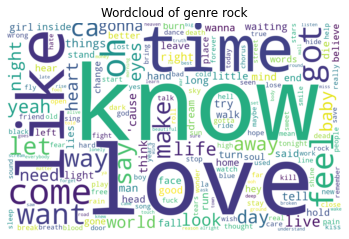

In [115]:
draw_wordcloud('rock')

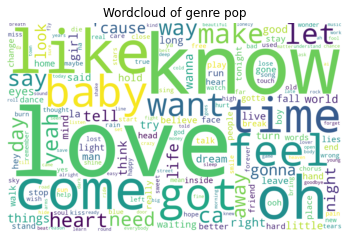

In [116]:
draw_wordcloud('pop')

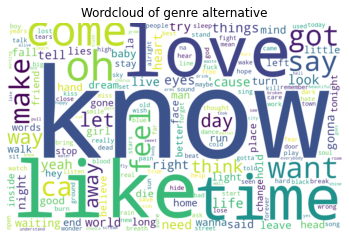

In [117]:
draw_wordcloud('alternative')

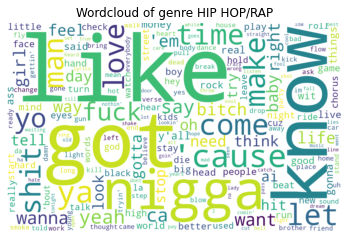

In [118]:
draw_wordcloud('HIP HOP/RAP')

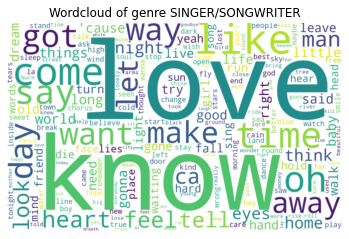

In [119]:
draw_wordcloud('SINGER/SONGWRITER')

## Linear regression based on genre

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [120]:
df_genre_all = pd.concat([df, bi_df], axis=1)

In [127]:
df_genre_all

,mxm_track_id,genre,rating,love,know,like,que,time,come,oh,...,BALADAS Y BOLEROS,MEDITATION,ARABIC POP,TRADITIONAL GOSPEL,SUFI,MODERN ERA,LATIN RAP,ANIME,FITNESS & WORKOUT,DUB
0,4623710,"[{'genre_id': 20, 'genre_name': 'Alternative'}]",9,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6477168,"[{'genre_id': 14, 'genre_name': 'Pop'}, {'genr...",15,0,5,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2516445,"[{'genre_id': 11, 'genre_name': 'Jazz'}]",19,11,0,1,0,6,4,0,...,0,0,0,0,0,0,0,0,0,0
3,3759847,"[{'genre_id': 14, 'genre_name': 'Pop'}, {'genr...",15,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3783760,"[{'genre_id': 20, 'genre_name': 'Alternative'}...",1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120087,8499430,"[{'genre_id': 10, 'genre_name': 'Singer/Songwr...",1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120088,2344272,"[{'genre_id': 20, 'genre_name': 'Alternative'}]",1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
120089,1417347,"[{'genre_id': 6, 'genre_name': 'Country'}]",14,0,1,3,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
120090,6849828,"[{'genre_id': 15, 'genre_name': 'R&B/Soul'}]",23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [145]:
def train_model(genre):
    data = df_genre_all[df_genre_all[genre.upper()] == 1]
    X = data.loc[:, 'love':df.columns[-1]]
    y = data['rating']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    

    model = LinearRegression()
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    return score

    #prediction = model.predict(test_data)

    #return prediction

In [146]:
score = train_model('rock')

In [ ]:
sco